In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
mat_file = "../data/student-mat.csv"
por_file = "../data/student-por.csv"

In [17]:
mat_df = pd.read_csv(mat_file, sep=";")
por_df = pd.read_csv(por_file, sep=";")

print(mat_df.head(10))

print(por_df.head(10))

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...  

In [18]:
print(mat_df.shape)
print()
print(por_df.shape)

(395, 33)

(649, 33)


In [19]:
# The Math dataset has 395 rows and 33 columns
# The Portuguese dataset has 649 rows and 33 columns
# Both datasets contain the same number of columns but different numbers of students

In [20]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [21]:
por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [22]:
print("Math df describe")
print(mat_df.describe())
print()
print("Portugal df describe")
print(por_df.describe())

Math df describe
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0

In [23]:
# Conclusion:
# - Both datasets have similar distributions for most variables.
# - The average age of students in both datasets is around 16.7 years.
# - The median education levels of parents (Medu, Fedu) are quite similar.
# - The G3 (final grade) variable has a slightly higher mean in the Portuguese dataset (11.9) compared to the Math dataset (10.4).
# - Absences are generally lower in the Portuguese dataset (mean of 3.66) compared to the Math dataset (mean of 5.71).
# These observations provide an initial understanding of the data distributions and central tendencies, which are crucial for the regression analysis on G3.

In [24]:
# Check for missing values
print(mat_df.isnull().sum())
print(por_df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health     

In [25]:
def show_heatmap(df, title):
    # Setting style for the plots
    sns.set_theme(style="whitegrid")
    
    # Numeric Data Statistics and Correlation
    print('-' * 40, '\nPearson\'s Correlation Heatmap\n', '-' * 40)
    plt.figure(figsize=(15, 10))
    corr = df.select_dtypes(include=np.number).corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75},
                annot_kws={"size": 10}, fmt='.2f')
    plt.title(title, fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.show()

---------------------------------------- 
Pearson's Correlation Heatmap
 ----------------------------------------


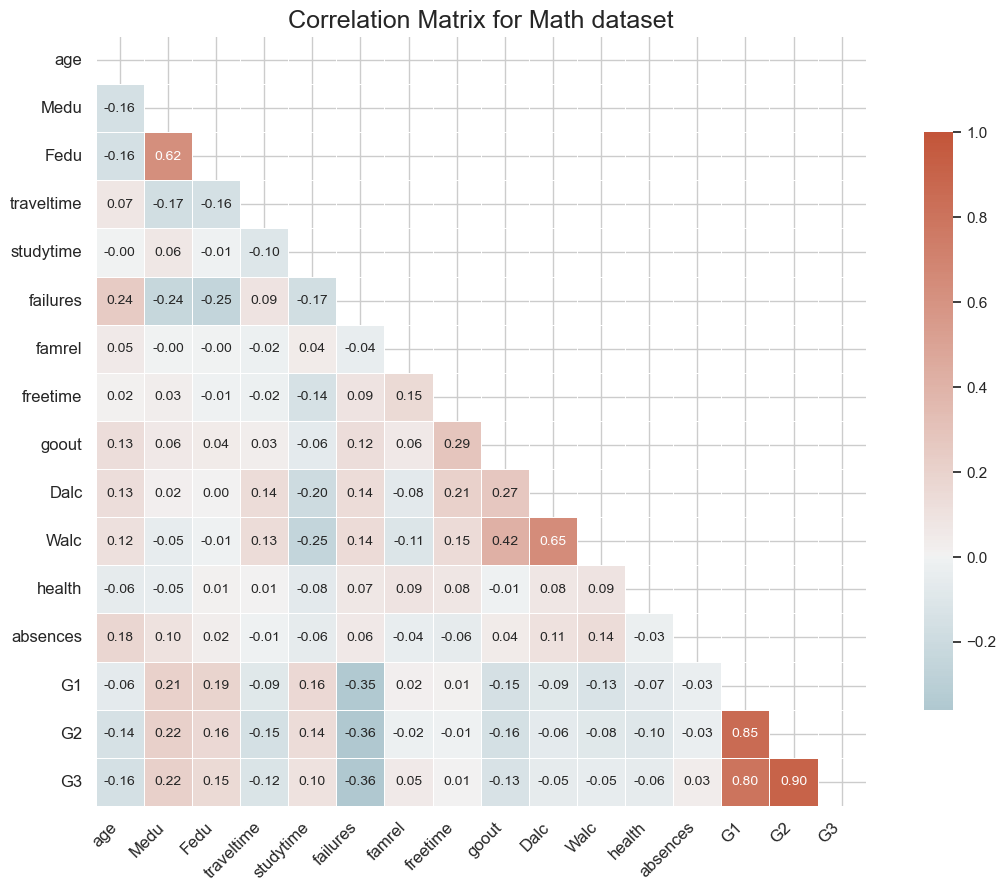

In [26]:
show_heatmap(mat_df, 'Correlation Matrix for Math dataset')

---------------------------------------- 
Pearson's Correlation Heatmap
 ----------------------------------------


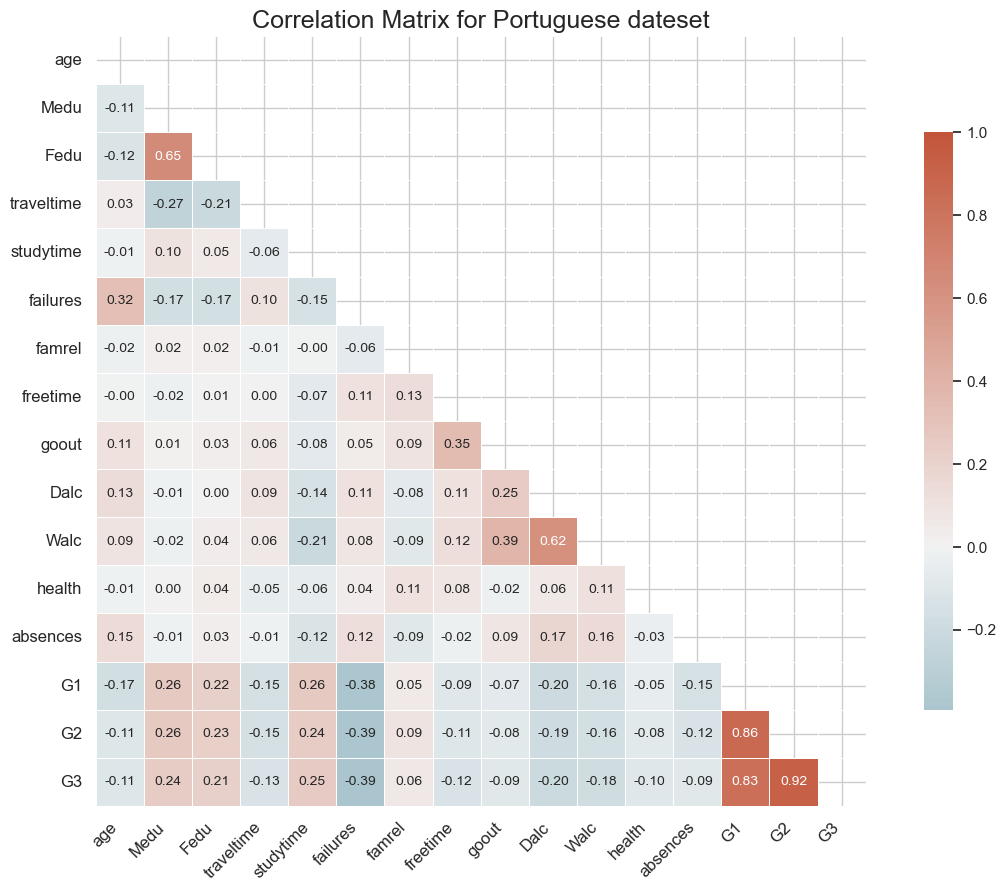

In [27]:
show_heatmap(por_df, 'Correlation Matrix for Portuguese dateset')

In [28]:
#Academic performance is consistently negatively impacted by the number of failures across both subjects.
#Higher parental education levels are associated with better academic performance.
#There are weak correlations between absences and academic performance, suggesting that absences alone may not significantly affect grades.
#Age has a slight negative correlation with performance, indicating that younger students tend to perform slightly better.
#Alcohol consumption is inversely related to study time, and higher consumption is generally associated with lower academic performance.

In [29]:
#creating catagorical columns list and numeric columns list
cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
                'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

num_columns = ['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']
cont_columns = ['age','failures','absences','G1','G2','G3']

In [30]:
def ncols_calculator(cols, nrows=3):
    '''
    Takes a list of columns and number of rows for plots
    
    Returns the number of cols to be used in matplotlib.pyplot.subplots()
    and how many axes will be left that need to be deleted
    '''
    n = len(cols)
    ncols = n // nrows
    if ncols * nrows < n:
        ncols += 1
    axdel = ncols * nrows - n
    return ncols, axdel

def bar_matrix(df, cols, nrows=3, annot=True, title='You Forget Your Title!'):
    '''
    df --> DataFrame
    cols --> List of Column names to be plotted
    nrows --> number of rows to split figure subplots, default is 3
    annot --> Boolean to decide whether percentage of each bar annotation is desired
    title --> Figure title to be displayed
    
    Function is designed to create one plot using sns.countplot for categorical columns
    '''
    ncols, axdel = ncols_calculator(cols, nrows)
    fig, axes = plt.subplots(ncols, nrows, figsize=(nrows * 5, ncols * 4), constrained_layout=True)
    plt.suptitle(title, size=22, fontweight='bold', fontfamily='serif')
    axes = axes.ravel()
    
    if axdel > 0:
        for ax in range(1, axdel + 1):
            axes[-ax].remove()
            
    for i in range(len(cols)):
        ax = axes[i]
        col = cols[i]
        sns.countplot(x=col, data=df, hue=col, palette='viridis', ax=ax, legend=False)
        ax.set_xlabel("")
        ax.set_ylabel("Count", fontsize=12)
        ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
        ax.set_ylim(0, max(ax.get_ylim()) + max(ax.get_ylim()) / 8)
        
        if annot:
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / df.shape[0])
                x = p.get_x() + p.get_width() / 2
                y = p.get_height() + (max(ax.get_ylim()) / 100)
                ax.annotate(percentage, (x, y), ha='center', fontsize=10, color='black')
                

def hist_bar(df, cols, title='Distribution of Continuous Features'):
    '''
    df --> DataFrame
    cols --> List of Column names to be plotted
    title --> Figure title to be displayed
    
    Function is designed to create histograms for continuous columns
    '''
    ncols = len(cols)
    fig, axes = plt.subplots(ncols, 1, figsize=(12, 6 * ncols), constrained_layout=True)
    fig.suptitle(title, size=20, fontweight='bold', fontfamily='serif')
    
    for i, col in enumerate(cols):
        # Histogram
        ax = axes[i]
        sns.histplot(df[col], kde=True, color='#00755E', ax=ax)
        ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)  

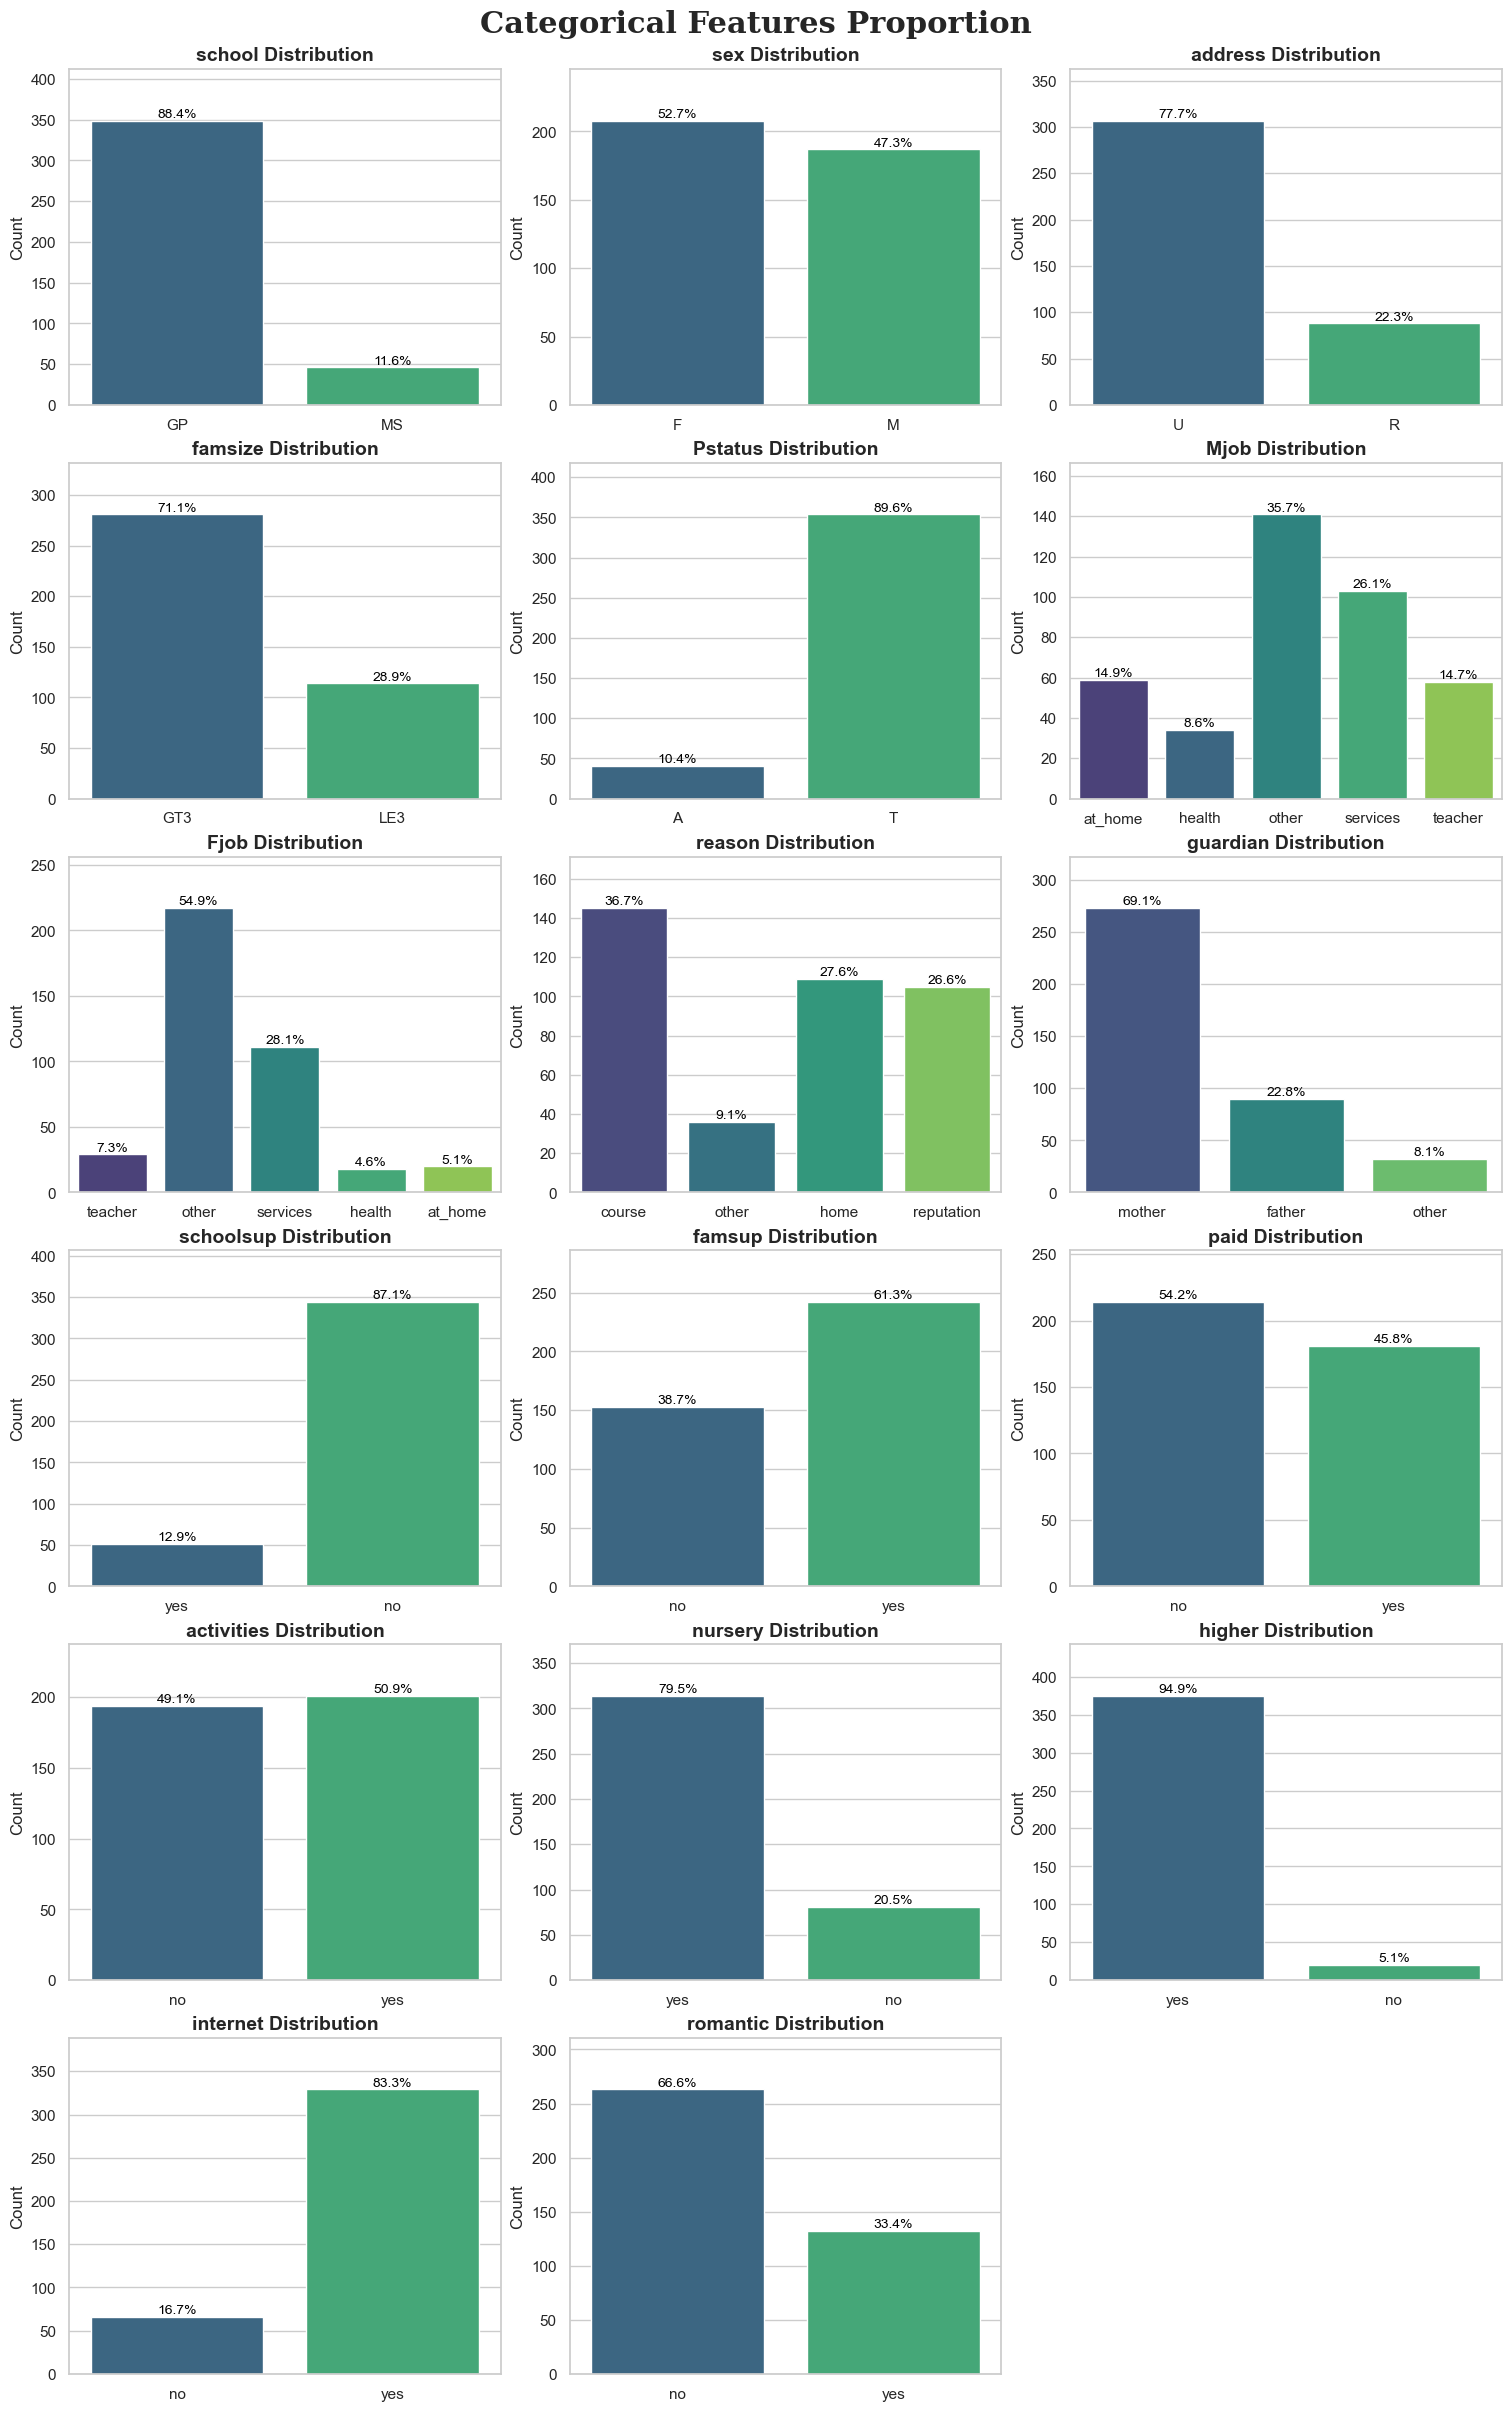

In [31]:
bar_matrix(mat_df,cat_columns,annot=True,title='Categorical Features Proportion')

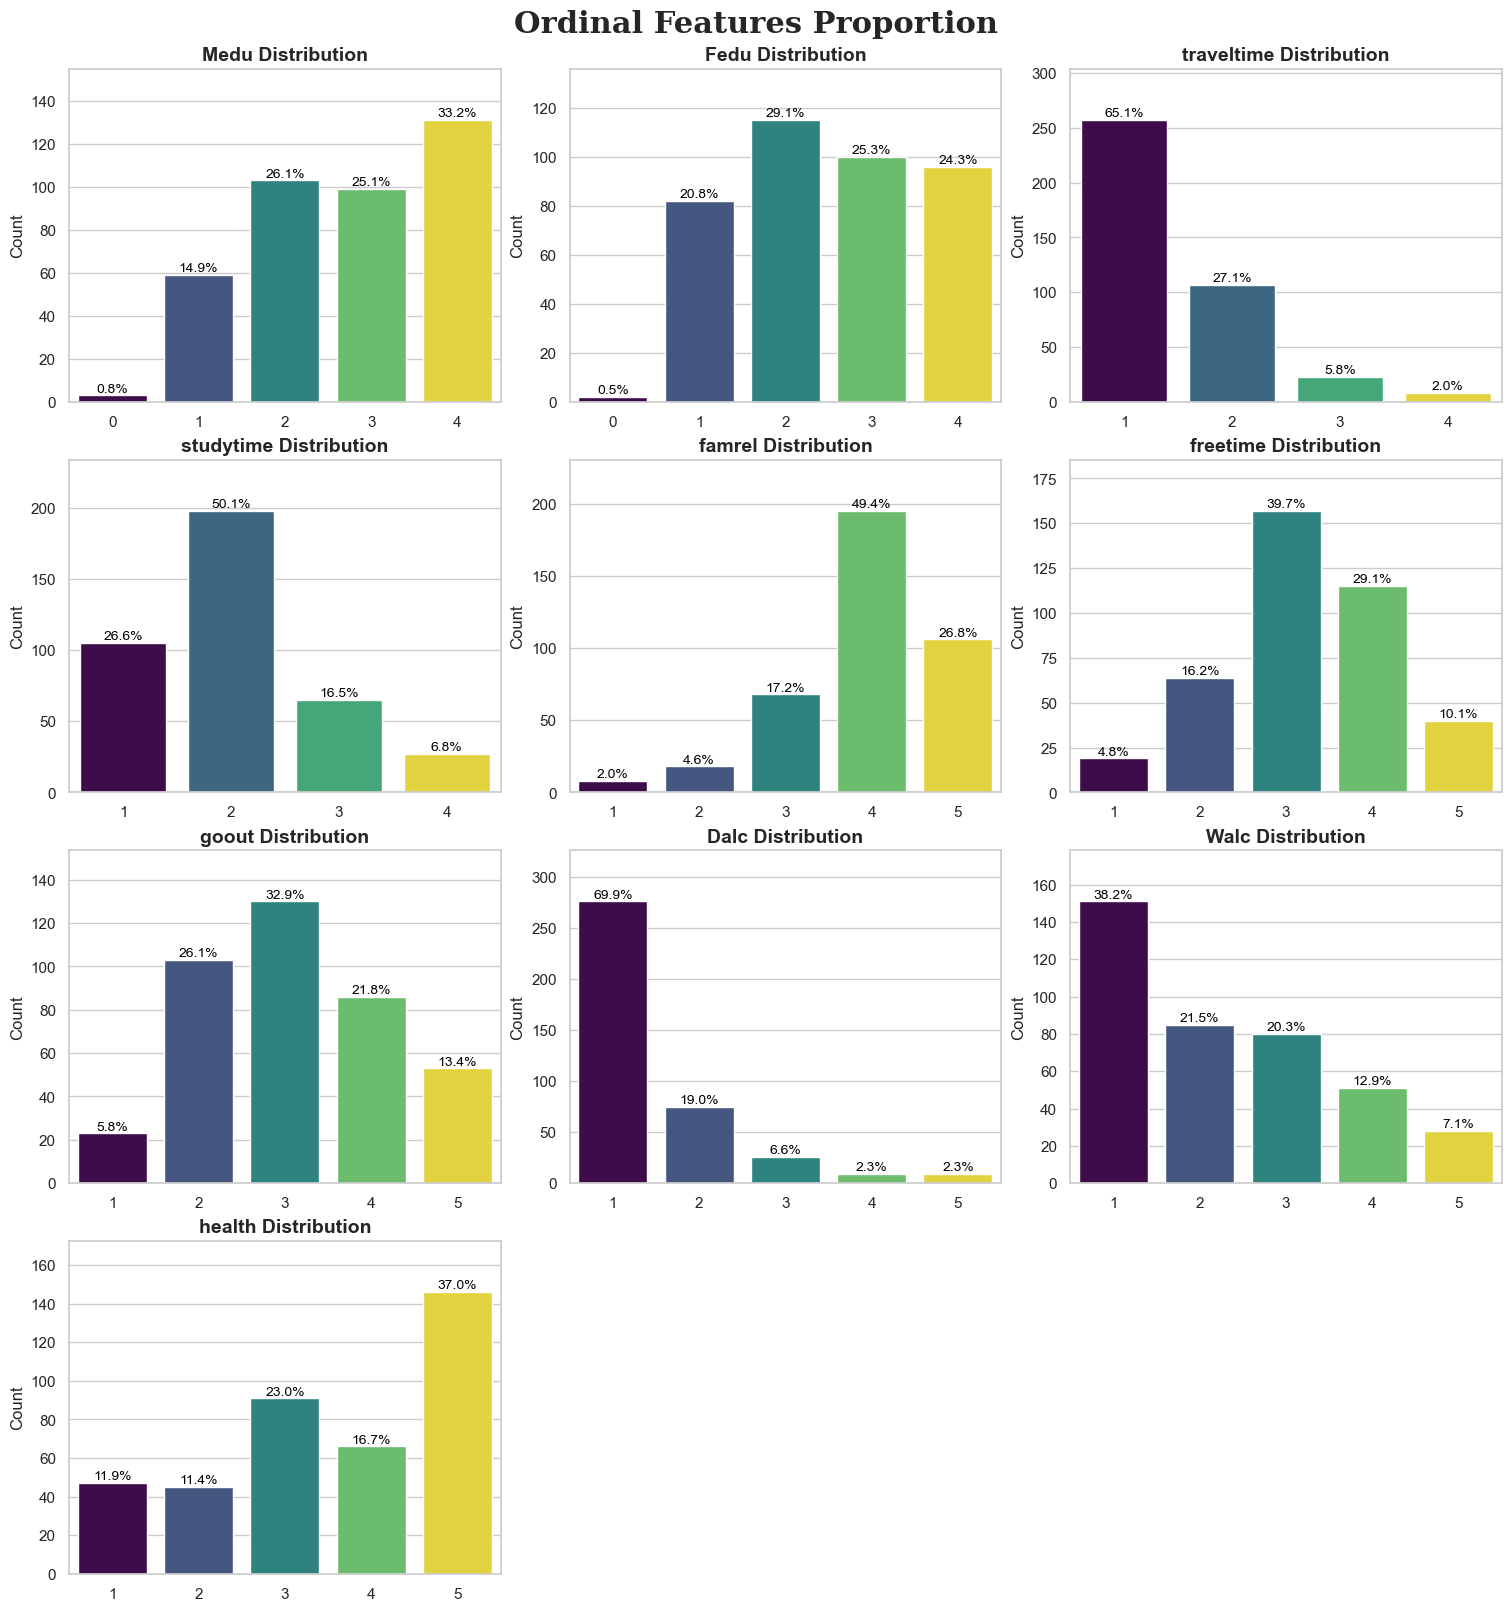

In [32]:
bar_matrix(mat_df,num_columns,annot=True,title='Ordinal Features Proportion')

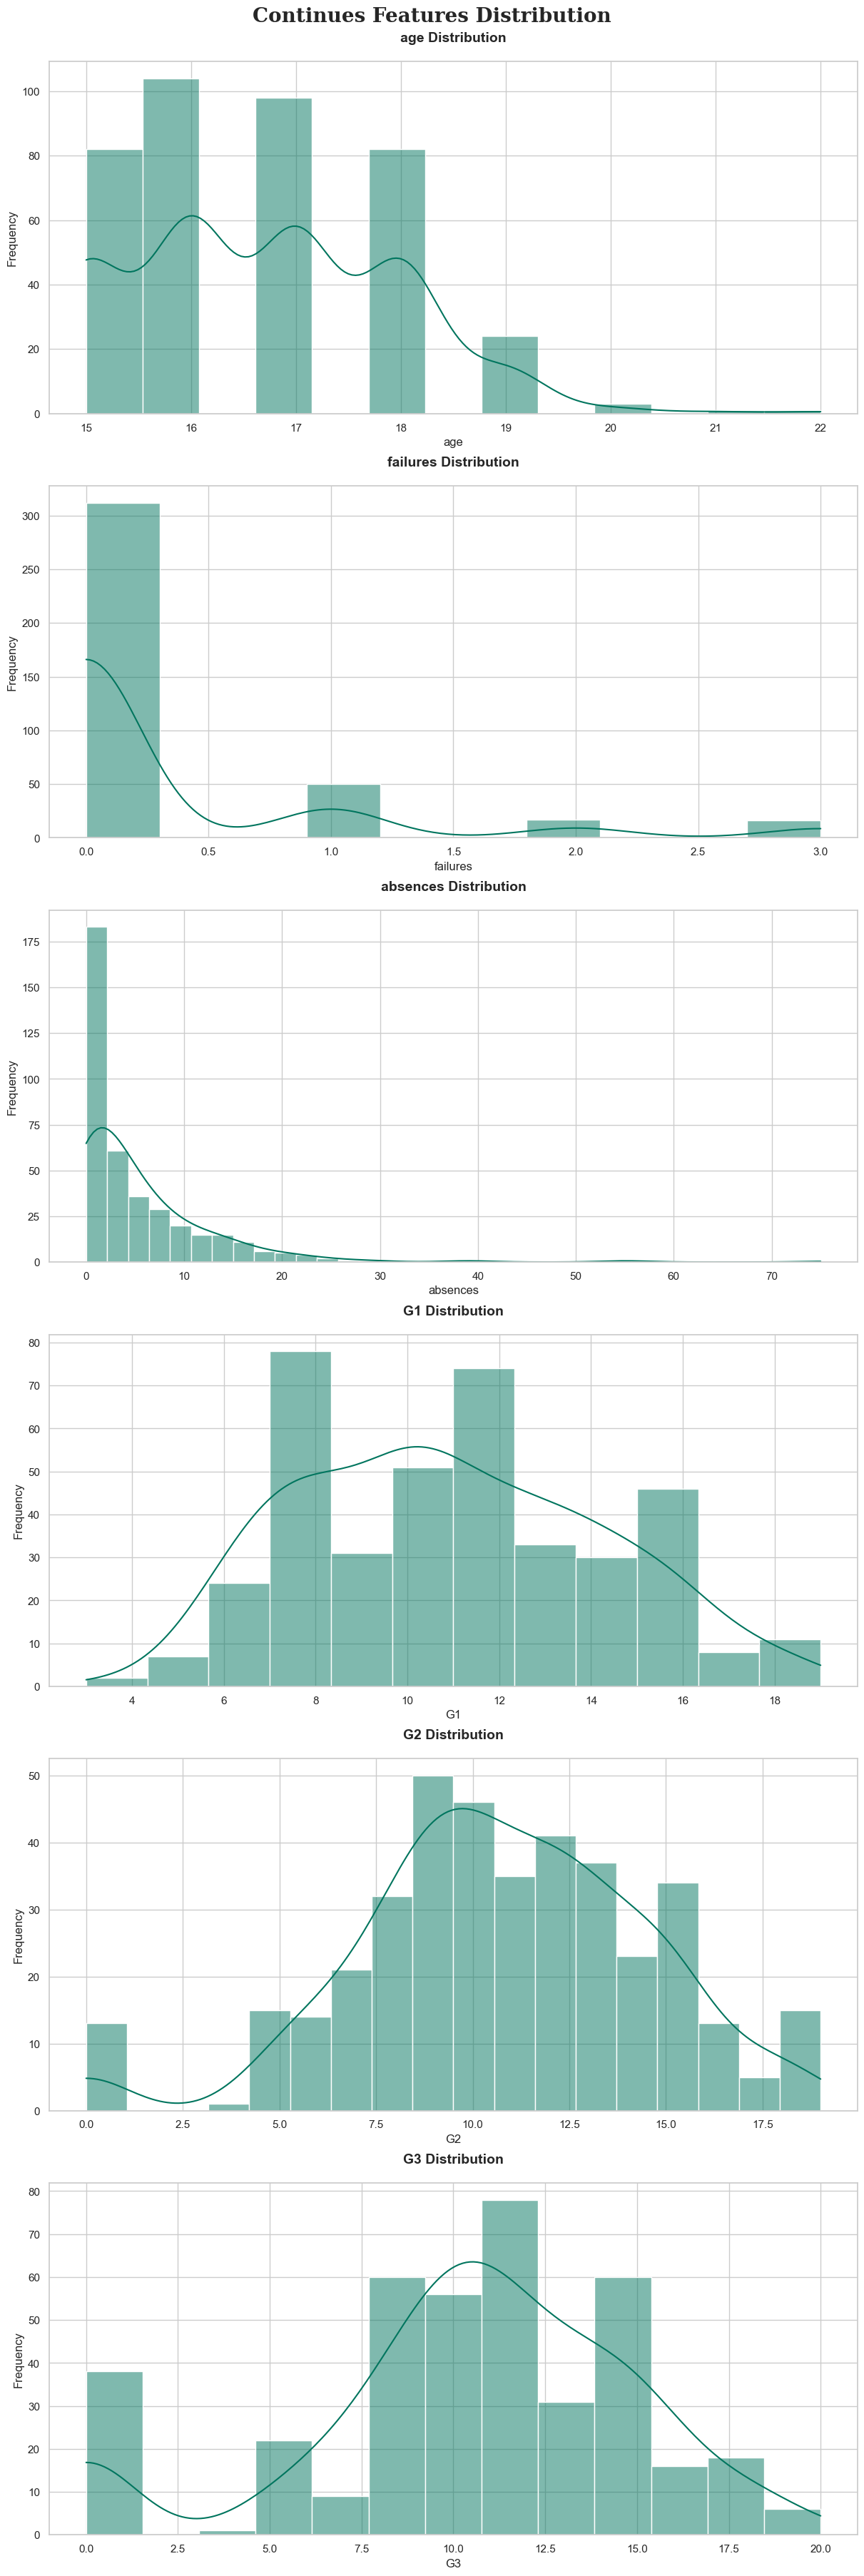

In [33]:
hist_bar(mat_df,cont_columns,title='Continues Features Distribution')

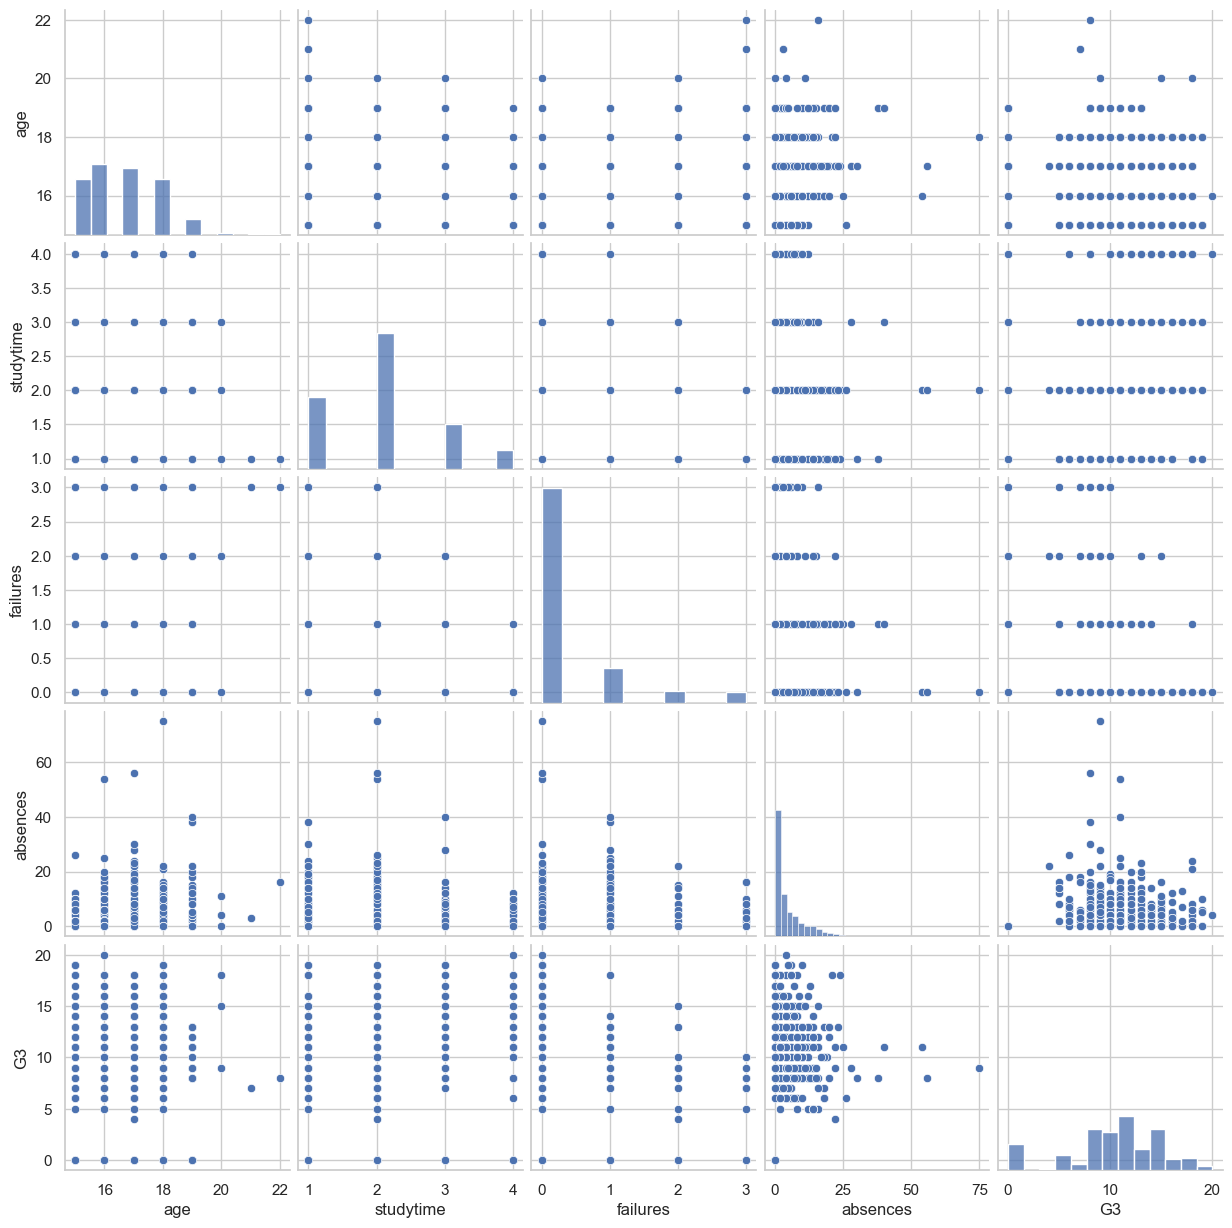

In [34]:
# Pairplot to see relationships
sns.pairplot(mat_df, vars=['age', 'studytime', 'failures', 'absences', 'G3'])
plt.show()

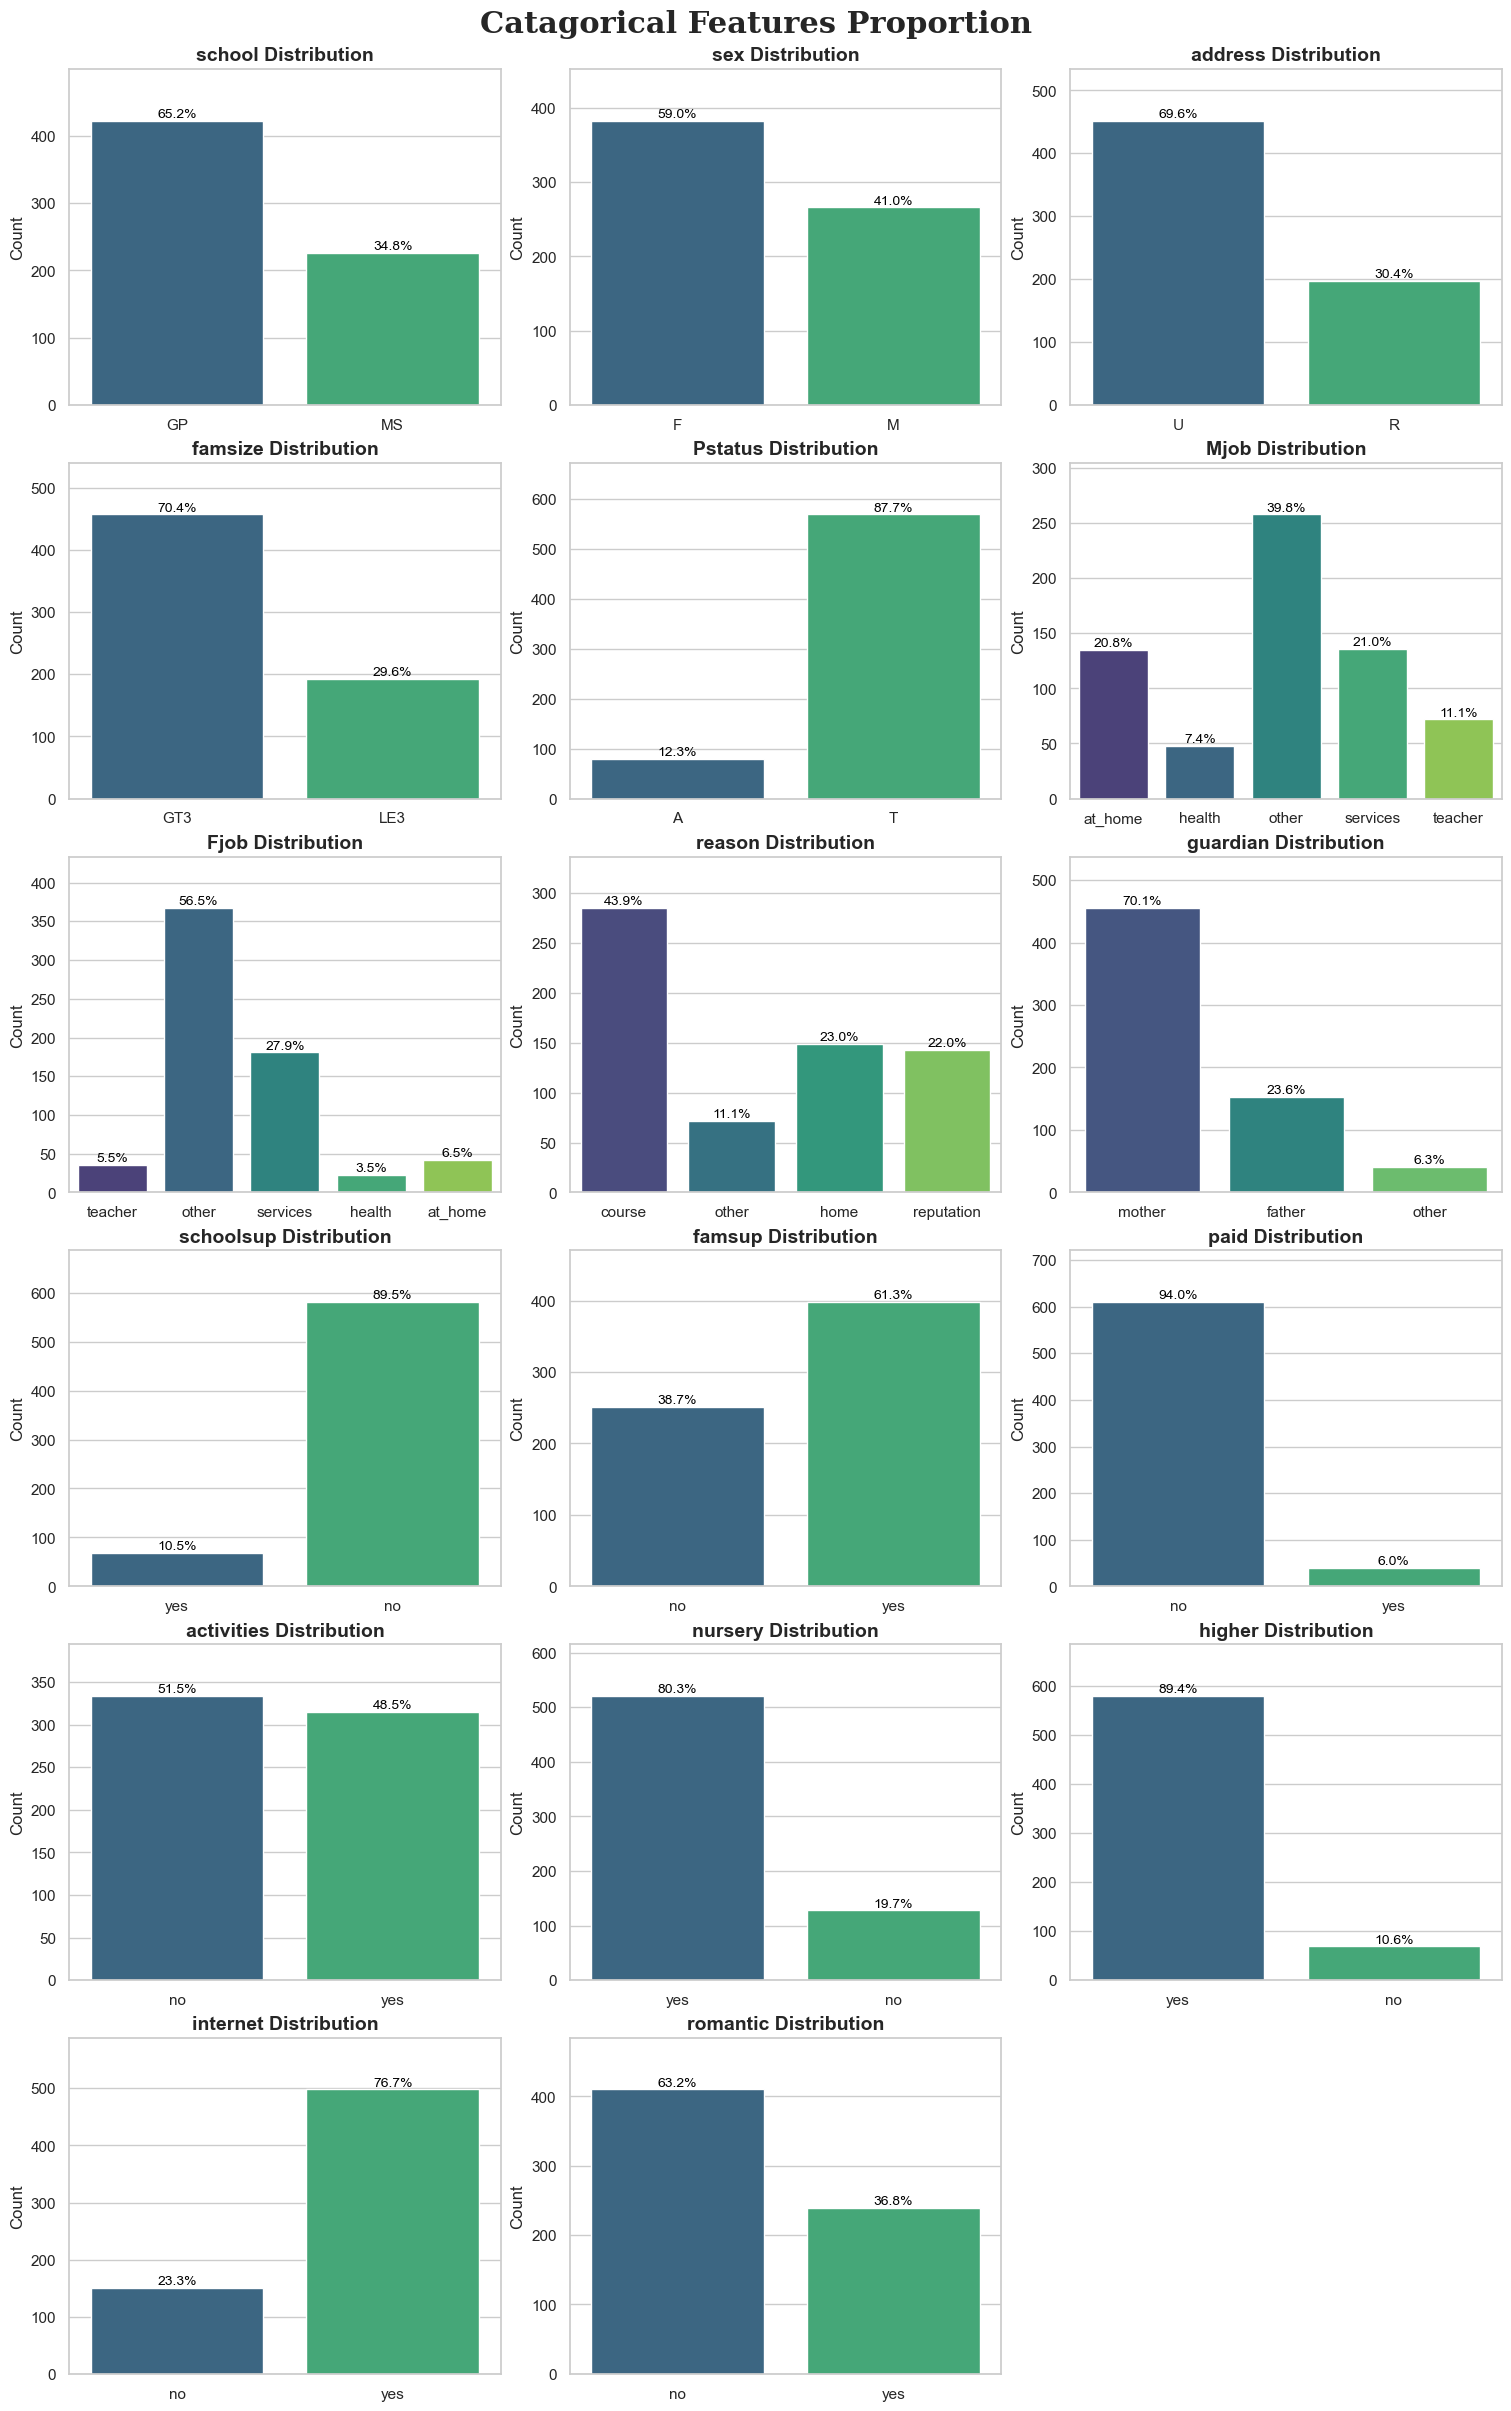

In [35]:
bar_matrix(por_df,cat_columns,annot=True,title='Catagorical Features Proportion')

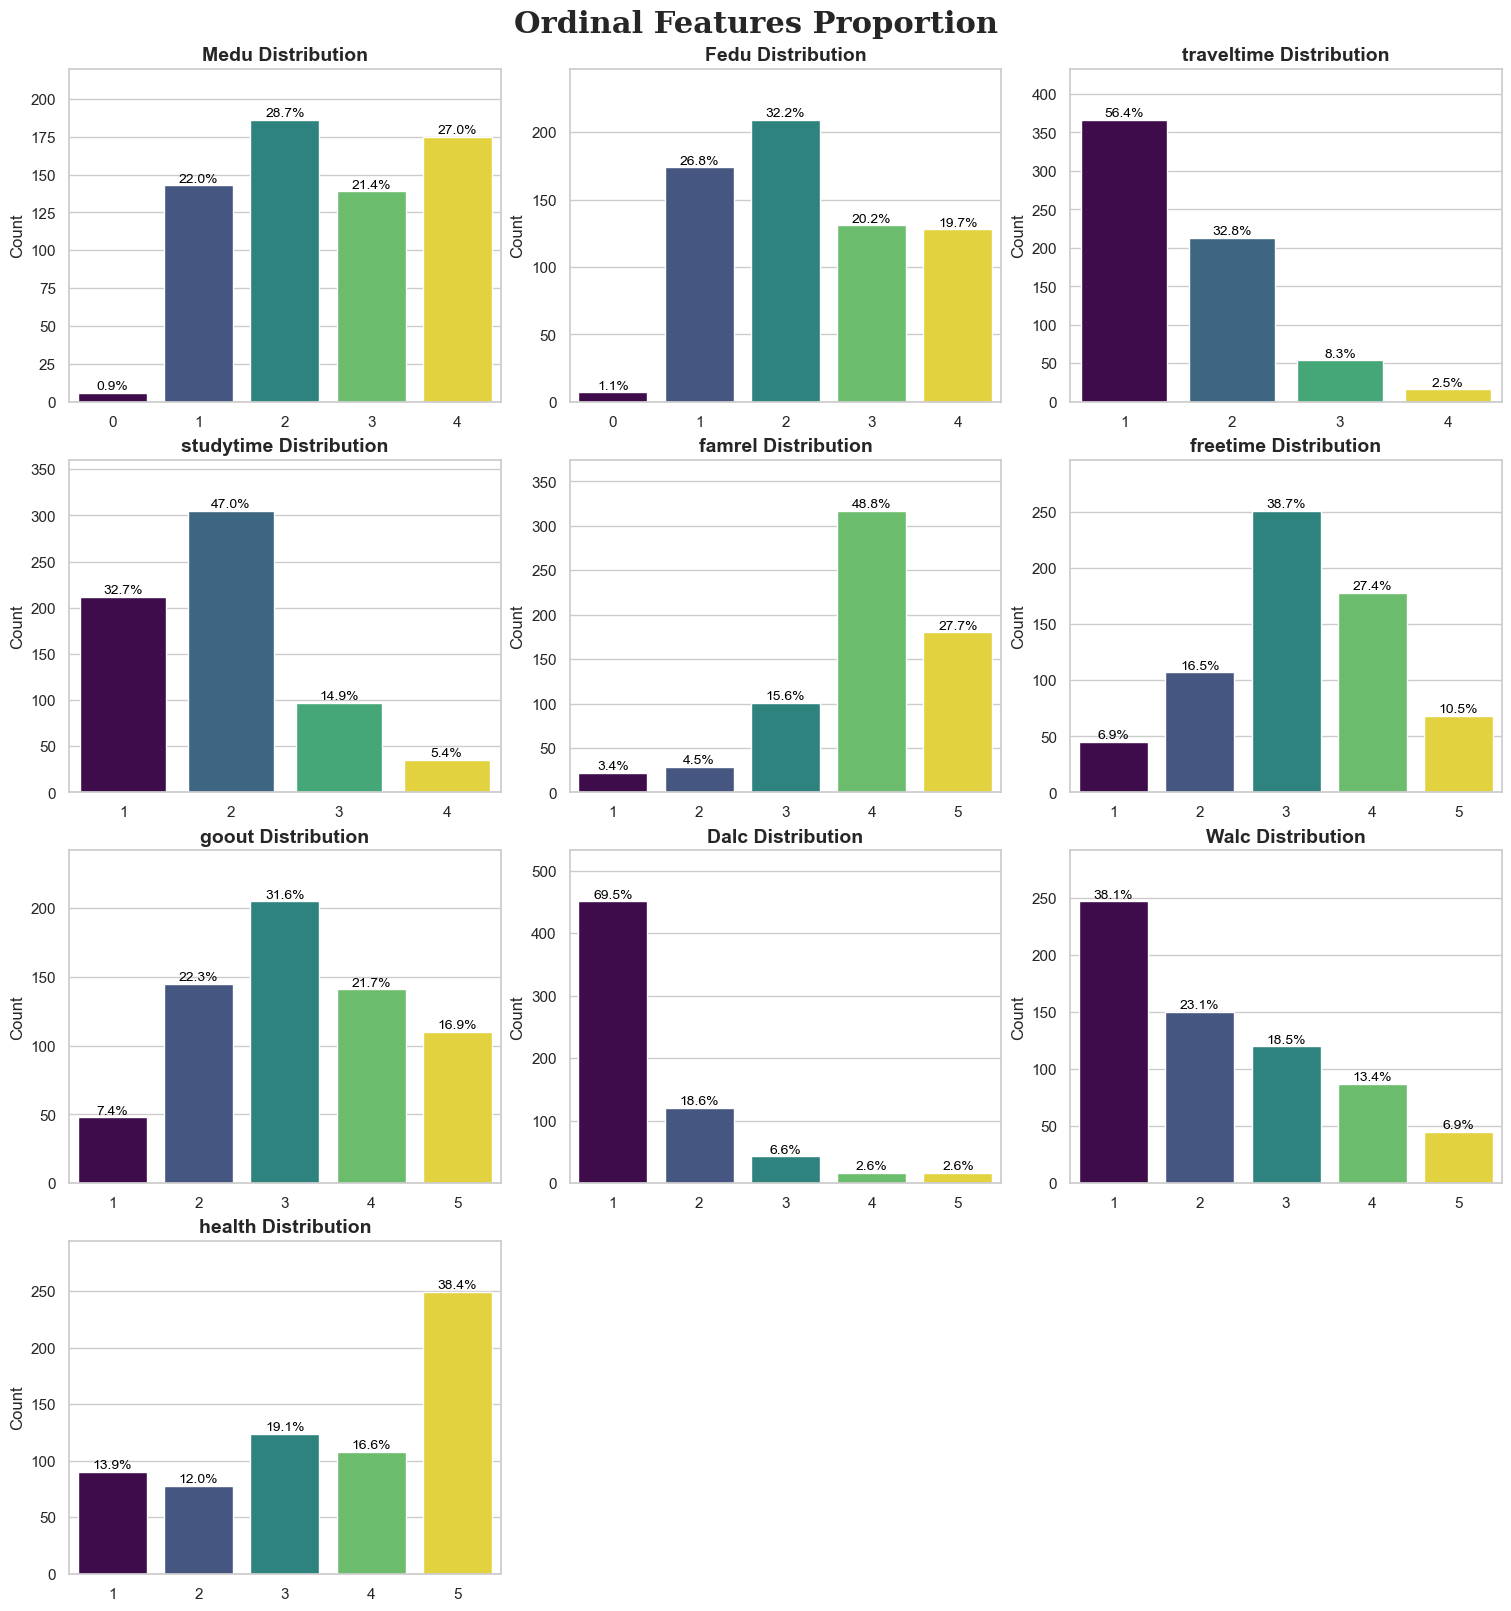

In [36]:
bar_matrix(por_df,num_columns,annot=True,title='Ordinal Features Proportion')

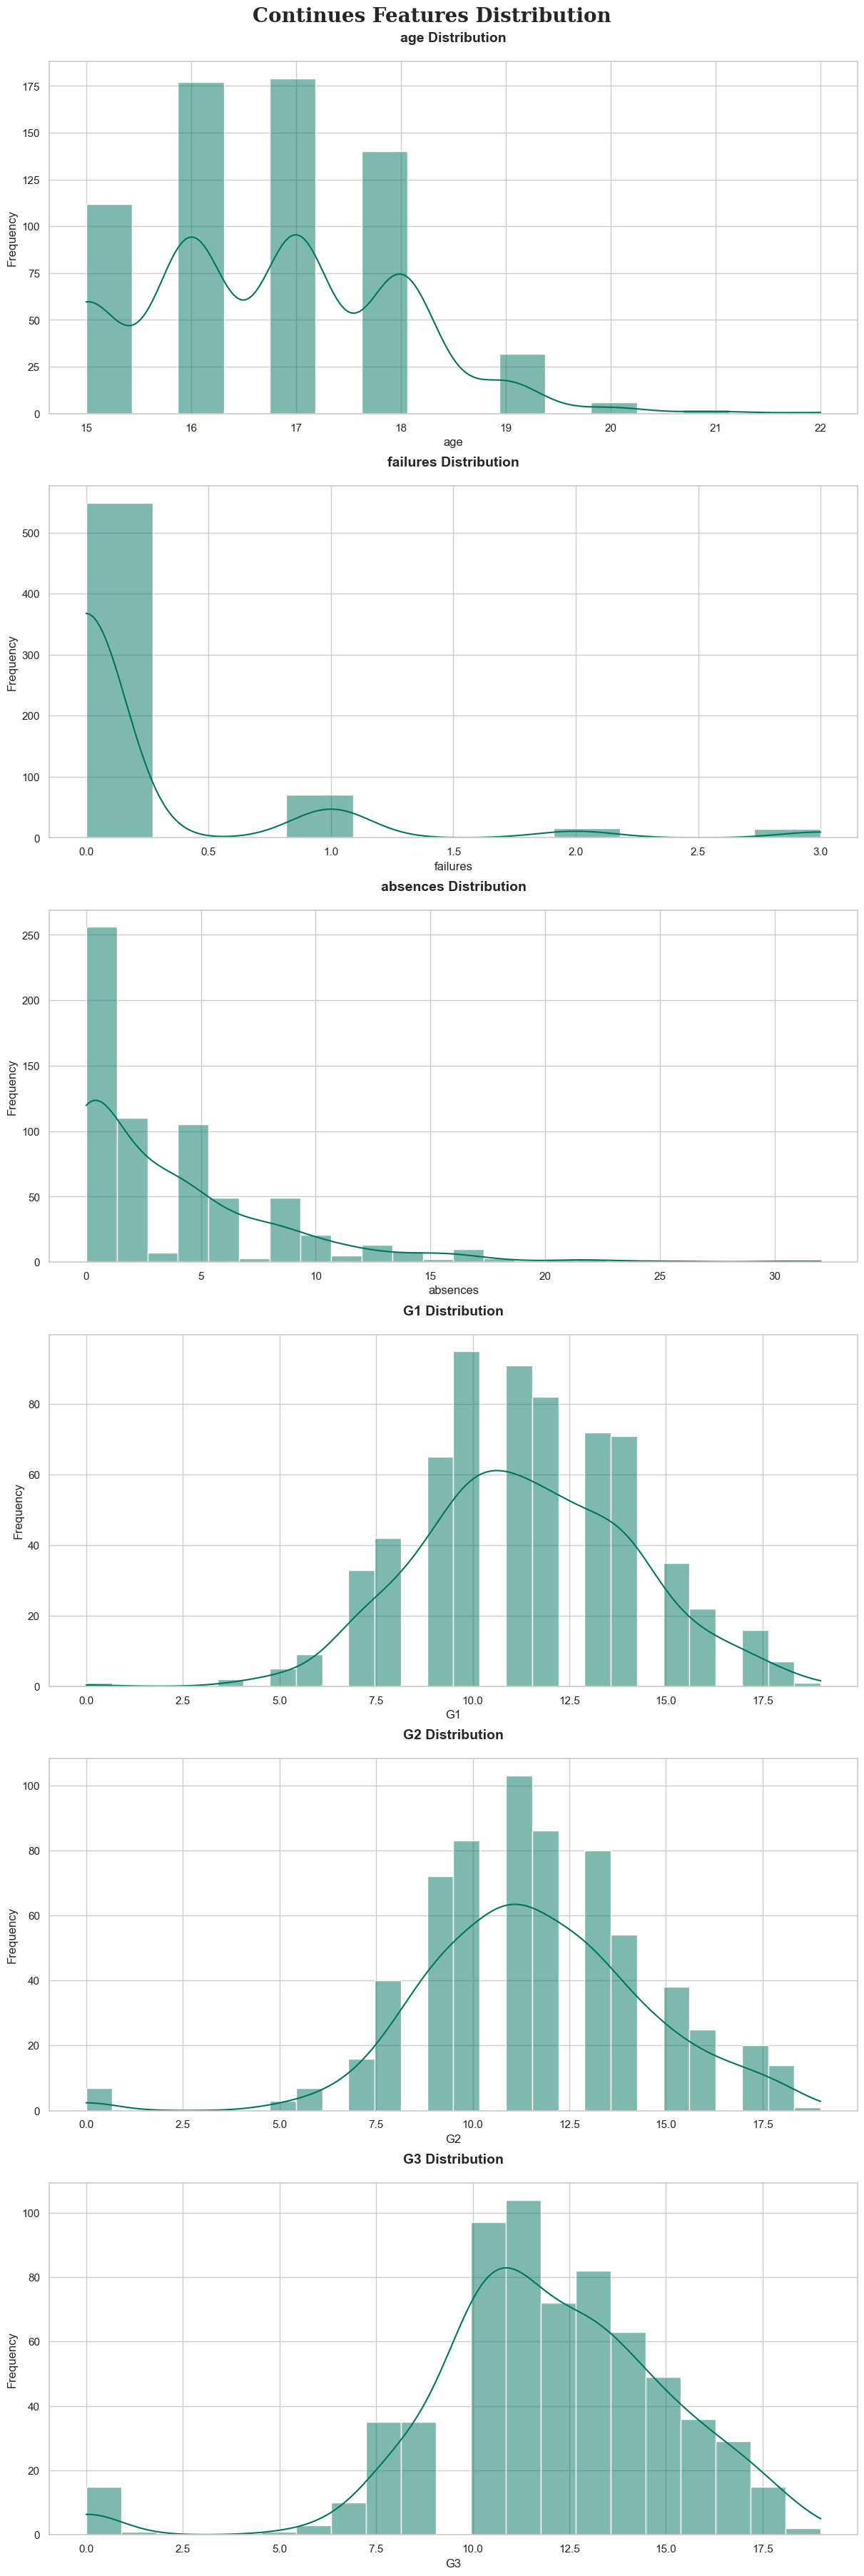

In [37]:
hist_bar(por_df,cont_columns,title='Continues Features Distribution')

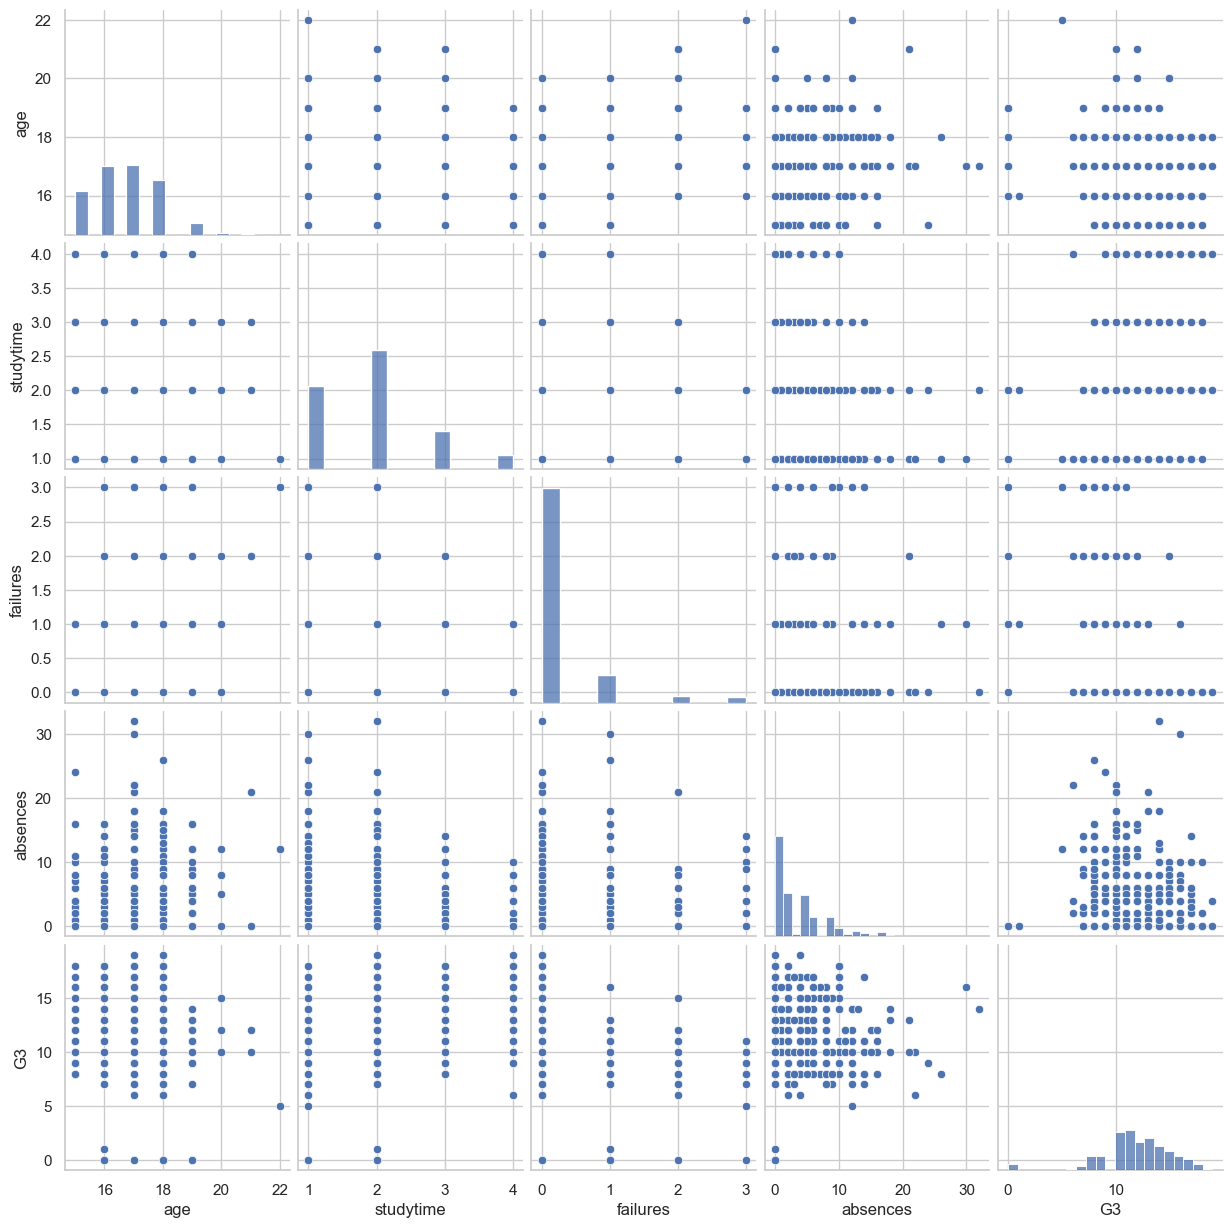

In [38]:
# Pairplot to see relationships
sns.pairplot(por_df, vars=['age', 'studytime', 'failures', 'absences', 'G3'])
plt.show()

In [39]:
""" 
Categorical Features Analysis

School Distribution: GP student count is dominating MS student count in both dataset especially in the Math
Sex: The gender distribution shows a relatively balanced split between male and female students in both subjects. With slight advantage for females in both data sets
Address: A larger proportion of students come from urban areas (U) compared to rural areas (R).
Family Size: Most students come from medium-sized to big families (GT3).
Parental Status: The majority of students’ parents live together (T).
Parental Jobs: The most common jobs for mothers and fathers are teacher and services, respectively.
Reason for Choosing the School: The primary reason for choosing the school is course preference.
Guardian: Most students are under the guardianship of their mother.
Support and Activities: School support (schoolsup) is generally lower and family support (famsup) is generally high, while a significant proportion of students participate in extracurricular activities (activities) and plan to pursue higher education (higher).
Internet Access: Most students have access to the internet at home.
Romantic Relationships: A notable proportion of students are in romantic relationships.

Ordinal Features Analysis

Parental Education: The education levels of mothers and fathers show a similar distribution, with many parents having secondary education.
Travel Time: Most students have a short travel time to school.
Study Time: Students typically spend 2-5 hours per week on study, indicating a moderate study habit.
Family Relationship: Family relationships are generally good, with most students rating them highly.
Free Time: Students have a moderate amount of free time.
Going Out: Students' frequency of going out is balanced, with no extreme tendencies.
Alcohol Consumption: Both weekday (Dalc) and weekend (Walc) alcohol consumption are generally low, with an increase over weekends.
Health: Health ratings are fairly high, with most students reporting good health.

Continuous Features Analysis
Age: The age distribution of students is concentrated around 15-18 years.
Failures: Most students have no past class failures, though a few have one or more.
Absences: The number of absences varies widely, with many students having few or no absences
Grades: The distributions of the grades (G1, G2, G3) show that most students perform moderately well, though there is variability, with some students scoring very low or very high.

Relationships Between Variables
Age and Study Time: Older students tend to study less, potentially due to increasing responsibilities or workload.
Study Time and Grades: A positive relationship is observed between study time and final grades (G3), suggesting that more study time could lead to better performance.
Failures and Grades: Students with more past failures tend to have lower final grades.
Absences and Grades: A negative correlation exists between absences and grades, indicating that higher absenteeism leads to lower performance.
"""

" \nCategorical Features Analysis\n\nSchool Distribution: GP student count is dominating MS student count in both dataset especially in the Math\nSex: The gender distribution shows a relatively balanced split between male and female students in both subjects. With slight advantage for females in both data sets\nAddress: A larger proportion of students come from urban areas (U) compared to rural areas (R).\nFamily Size: Most students come from medium-sized to big families (GT3).\nParental Status: The majority of students’ parents live together (T).\nParental Jobs: The most common jobs for mothers and fathers are teacher and services, respectively.\nReason for Choosing the School: The primary reason for choosing the school is course preference.\nGuardian: Most students are under the guardianship of their mother.\nSupport and Activities: School support (schoolsup) is generally lower and family support (famsup) is generally high, while a significant proportion of students participate in ex